# 비용 함수 목표
---

이전 포스팅에서 어떤 Regression 모델이 좋은 모델인지에 대해서 알아보는 시간을 가졌습니다.

어떤 Regression 모델이 좋은 모델일까? 라는 질문에 대해 **다항 회귀의 Degree에 대한 이슈**가 발생한다는 것을 알게 되었습니다. 

지난 포스팅의 핵심을 살펴보자면 **Degree를 지나치게 낮게 가져가는 경우 너무 단순한 모델이 생성되어 Underfitting 되기 때문에 고편향(High Bias)성**을 가지게 됩니다.  

반대로 **Degree를 너무 높게 가져가는 경우 지나치게 학습 데이터에 fit한 모델이 생성되어 Overfitting 문제가 발생하고 고분산(High Variace)성**을 가지게 됩니다.

따라서 좋은 회귀 모델을 만들기 위해선 선형 모델의 **비용함수(RSS)를 최소화 하면서도 회귀 계수 값이 커지지 않는 균형점**을 찾아야합니다.

그 균형점을 찾기 위한 방법으로 **회귀 계수의 크기를 제어하면서 과적합을 개선하기 위해 비용(Cost)함수 목표를 다음과 같이 변경**할 수 있습니다.

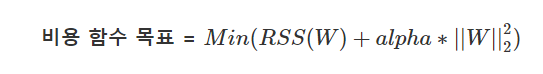

위 수식에서 **`alpha`**는 **`학습 데이터 적합 정도와 회귀 계수의 크기를 제어하는 튜닝 파라미터`**입니다.

위 수식의 최소값을 만족하는 W 벡터를 찾기 위해 alpha 값이 어떤 역할을 하는지 알아보겠습니다.

먼저 **alpha 값이 0 또는 0에 수렴**하는 매우 작은 값이라면 위 수식은 다음과 같이 변합니다.

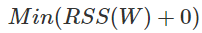

반면 **alpha 값이 무한대에 가까운** 매우 큰 값이라면 `RSS(W)`에 비해 아래의 값이 비정상적으로 커지게 됩니다.

따라서 **alpha 값을 크게 가져간다면 회귀 계수 W를 작게 가져가는 것으로 과적합을 개선**할 수 있으며 **alpha 값을 작게 가져가는 경우 회귀 계수 W의 값이 커져도 어느 정도 상쇄**가 가능하여 데이터 적합을 개선할 수 있게 됩니다.

이처럼 alhpa 값을 0에서부터 지속적으로 증가시켜 회귀 계수 값의 크기를 감소시키는 것이 가능하며 비용 함수에 **alhpa 값으로 패널티를 부여해 회귀 계수 값의 크기를 감소**시켜 과적합을 개선하는 방법을 **규제(Regularization)** 이라고 합니다.

여기서 규제에는 L1 규제와 L2 규제로 나뉘는데 L1 규제는 아래의 식과 같이 W의 절댓값에 대해 패널티를 부여하는 규제 방법으로 영향력이 크지 않은 회귀 계수 값을 0으로 변환하며 **L1 규제를 적용한 회귀를 라쏘(Lasso) 회귀**라 부릅니다.

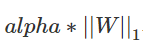

이어서 L2 규제는 아래의 식과 같이 W의 제곱에 대해 패널티를 부여하는 방법을 사용하며 **L2 규제를 적용한 회귀를 릿지(RIdge) 회귀**라 부릅니다.

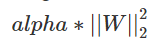

# 릿지 회귀(Ridge)
---

앞에서도 설명했듯이 릿지 회귀는 L2 규제를 이용한 회귀로 Ridge 클래스의 주요 생성 파라미터는 alpha입니다.

따라서 **릿지 회귀는 alpha 값이 커질수록 회귀 계수 값을 작게 만든다는 특징**이 있습니다.

릿지 회귀 실습을 위해 boston 주택 가격 데이터를 로드하고 이를 Ridge 회귀 모델로 학습해 cross_val_score() 함수로 평가합니다.

In [6]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

# boston 데이터 세트 로드

bst = load_boston()

bstDF = pd.DataFrame(bst.data, columns = bst.feature_names)

# boston 데이터 세트의 Target은 주택 가격

bstDF['PRICE'] = bst.target

# 선형회귀 모델 생성을 위한 라이브러리 임포트
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 학습에 사용할 데이터 준비
y_target = bstDF['PRICE']
X_data = bstDF.drop(['PRICE'], axis=1, inplace=False)

# train, test 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state = 156)

In [8]:
# alpha=10 으로 설정한 릿지 회귀 모델 생성

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE scores : ', np.round(avg_rmse, 2))

5 folds의 개별 Negative MSE scores :  [-11.42 -24.29 -28.14 -74.6  -28.52]
5 folds의 개별 RMSE scores :  [3.38 4.93 5.31 8.64 5.34]
5 folds의 평균 RMSE scores :  5.52


5폴드로 나누어 모델 평가를 실시한 결과 평균 RMSE가 5.52로 일반적인 Linear Regression을 이용했을 때의 5.83보다 더 뛰어난 예측 성능을 보입니다.

In [9]:
# 릿지에 사용될 alpha 파라미터 값
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 RMSE 계산
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    # cross_val_score를 이용해 5fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    
    print('alpha {0} 일 때 5 폴드의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 폴드의 평균 RMSE : 5.829
alpha 0.1 일 때 5 폴드의 평균 RMSE : 5.788
alpha 1 일 때 5 폴드의 평균 RMSE : 5.653
alpha 10 일 때 5 폴드의 평균 RMSE : 5.518
alpha 100 일 때 5 폴드의 평균 RMSE : 5.330


위 cross_val_score() 결과 alpha가 100일 때 5개 폴드의 평균 RMSE가 가장 작게 나타나며 위 **alpha 값에 따른 피처의 회귀 계수가 어떻게 변화하는지 시각화**합니다.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

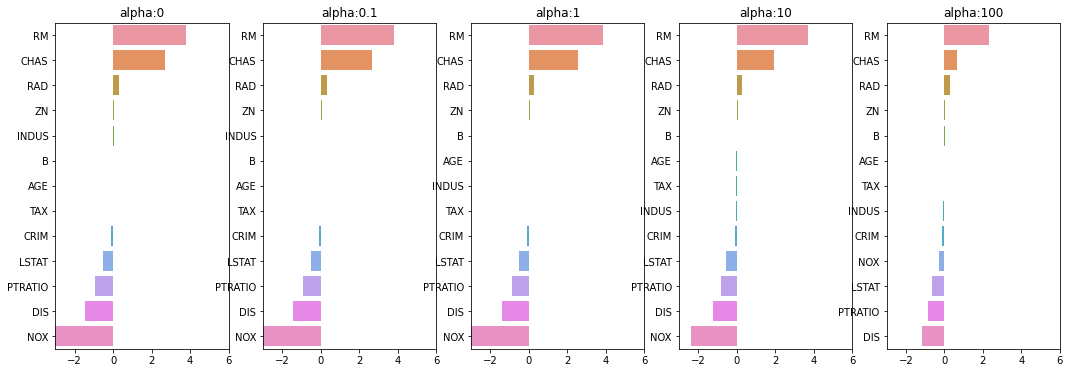

In [31]:
# 각 alhpa값에 따른 회귀 계수 값 시각화
fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DF
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화, pos는 axis의 위치
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    
    # alhpa 값에 따른 피처별 회귀 계수를 Sereis로 변환하고 DF 칼럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index = X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    # barplot으로 각 alhpa값에서의 회귀 계수를 시각화
    coeff = coeff.sort_values(ascending=False)
    axes[pos].set_title(colname)
    axes[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axes[pos])

plt.show()

릿지 회귀는 alpha값을 크게 지정할수록 회귀 계수 값이 작아진다는 특징이 있습니다. 위 그래프를 통해 NOX : 일산화질소 농도 피처의 회귀 계수가 alpha가 100일 때 매우 작아진 것을 확인할 수 있습니다.

위 그래프를 히트맵을 이용해 아래와 같이 시각화 한 결과 더욱 직관적으로 alpha 값이 증가할수록 회귀 계수의 값이 감소하는 것을 확인할 수 있습니다.

**여기서 한가지 중요한 점은 릿지 회귀의 경우 회귀 계수를 작게 만든다는 특징이 있지만 0으로 만들지는 않기 때문에 피처 선택의 효과는 기대할 수 없다는 점입니다!**

In [32]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


<AxesSubplot:>

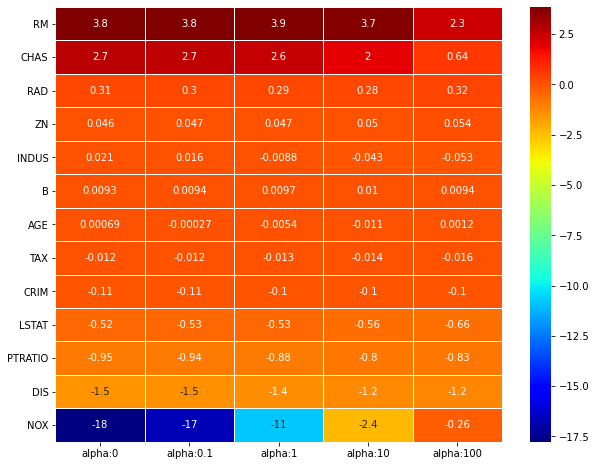

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(coeff_df.sort_values(by=sort_column, ascending=False), annot=True, linewidths=.5, cmap='jet')

# 라쏘 회귀(Lasso)
---

라쏘 회귀(Lasso)는 W의 절댓값에 패널티를 부여하는 L1 규제를 선형회귀에 적용한 회귀 모델로 비용함수의 목표는 다음의 식을 최소화하는 W를 찾는 것입니다.

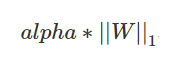

위에서도 설명했듯이 L2 규제를 적용한 릿지 회귀처럼 회귀 계수를 감소시키는 방법이 아닌 **불필요한 회귀 계수를 0으로 만들어 제거하기 때문에 피쳐 선택의 기능**이 가능하다는 점이 특징입니다.

**라소 회귀(Lasso) 클래스의 주요 생성 파라미터 또한 alpha**이며 다음의 예제를 통해 alhpa 값이 변경됨에 따라 RMSE와 회귀 계수가 어떻게 변화하는지 알아보겠습니다.

이후 ElasticNet 회귀 또한 바로 예제를 진행하기 위해 아래의 함수를 정의합니다.

In [116]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE와 회귀 계수 반환
def get_linear_reg_eval(model_name, params=None, X_data_n = None, y_target_n=None,
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name, '#######')
    for param in params:
        if model_name == 'Ridge' : model = Ridge(alpha=param)
        elif model_name == 'Lasso' : model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n,
                                        y_target_n, scoring='neg_mean_squared_error', cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        
        print('alpha {0} 일 때 5 폴드의 평균 RMSE : {1:.3f}'.format(param, avg_rmse))
            
        # cross_val_score는 evaluation metric만 반환, 모델을 다시 학습해 회귀 계수 반환
            
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 series로 변환, 이를 DF 칼럼으로 추가
            coeff = pd.Series(data=model.coef_, index = X_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname] = coeff
    return coeff_df

In [106]:
# 라쏘에 사용될 alpha 파라미터 값 정의 
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]

# 모델을 Lasso로 지정하고 get_linear_reg_eval() 함수 실행
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07 일 때 5 폴드의 평균 RMSE : 5.612
alpha 0.1 일 때 5 폴드의 평균 RMSE : 5.615
alpha 0.5 일 때 5 폴드의 평균 RMSE : 5.669
alpha 1 일 때 5 폴드의 평균 RMSE : 5.776
alpha 3 일 때 5 폴드의 평균 RMSE : 6.189


Lasso 회귀 모델을 이용해 위 함수를 실행한 결과 alpha값이 0.07일 때 가장 좋은 RMSE를 보입니다. 이 경우 일반적인 선형회귀 모델의 결과보다는 좋지만 릿지 회귀 보다는 좋지 못한 성능을 보입니다.

아래는 위 lasso_alphas에 따른 피처별 회귀 계수입니다.

In [109]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


라쏘 회귀 모델의 각 alpha에 따른 피처별 회귀 계수를 아래와 같이 시각화 한 결과 alpha 값이 증가됨에 따라 회귀 계수가 0으로 바뀌는 피쳐들이 존재합니다.

이처럼 **라쏘 회귀 모델은 alpha 값이 조정됨에 따라 회귀 계수가 0으로 변하는 피처들이 발생하며 이렇게 회귀 계수가 0으로 변한 피처들을 회귀 식에서 제외하는 효과를 기대할 수 있습니다.**

<AxesSubplot:>

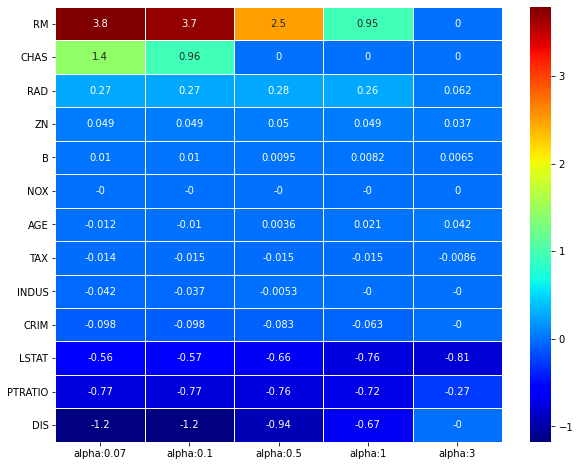

In [111]:
plt.figure(figsize=(10, 8))
sns.heatmap(coeff_lasso_df.sort_values(by=sort_column, ascending=False), annot=True, linewidths=.5, cmap='jet')

# 엘라스틱넷 회귀(Elastic Net)
---

**엘라스틱넷 회귀(Elastic Net)회귀는 앞서 살펴본 L1 규제와 L2 규제를 결합**한 회귀로 엘라스틱넷 회귀의 비용 함수 목표는 아래의 식을 최소화 하는 W를 찾는 것입니다.

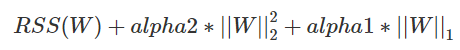

앞서 살펴본 **라쏘 회귀의 경우 L1 규제를 이용해 중요 피처를 선택하고 그 외의 피처들은 회귀 계수를 0으로 만들어 회귀 식에서 제외**하기 때문에 alhpa 값에 따라 회귀 계수의 변동이 심할 수 있다는 단점이 존재합니다. 따라서 **엘라스틱넷 회귀는 이를 보완하기 위해 L2 규제에 L1 규제를 결합**한 회귀입니다.

ElasticNet 클래스의 주요 생성 파라미터는 alpha와 l1_ratio입니다.

In [118]:
# l1_ratio를 0.7로 고정
# l1_ratio가 1이면 L1 규제와 동일, 0이며 L2규제와 동일
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]

# 모델을 Lasso로 지정하고 get_linear_reg_eval() 함수 실행
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07 일 때 5 폴드의 평균 RMSE : 5.542
alpha 0.1 일 때 5 폴드의 평균 RMSE : 5.526
alpha 0.5 일 때 5 폴드의 평균 RMSE : 5.467
alpha 1 일 때 5 폴드의 평균 RMSE : 5.597
alpha 3 일 때 5 폴드의 평균 RMSE : 6.068


**ElasticNet 회귀 실행 결과 alhpa가 0.5일 때 가장 좋은 성능을 보이며 아래의 히트맵 시각화를 통해 단순 Lasso 회귀 보다 회귀 계수가 0으로 변하는 피처들이 적은 것을 확인할 수 있습니다.**

In [122]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


<AxesSubplot:>

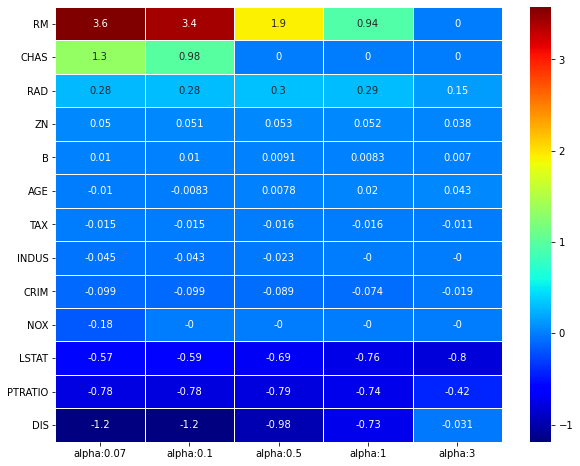

In [123]:
plt.figure(figsize=(10, 8))
sns.heatmap(coeff_elastic_df.sort_values(by=sort_column, ascending=False), annot=True, linewidths=.5, cmap='jet')

이 글은 머신러닝 완벽가이드를 참고했으며 영리 목적이 아닌 개인적인 학습을 위해 정리한 내용을 바탕으로 작성했음을 밝힙니다.